## Introduction to Scikit-Learn (sklearn)

In [4]:

#0. An end-to-end sci-kit-learn workflow
#1. Getting data ready
#2. Choose the right estimator/algo
#3. Fit model/algo and use to maek predictions
#4. Evaluate model
#5. Improve model
#6. Save and load trained model
#7. Putting all together

## 0. An end-to-end sci-kit-learn workflow

In [19]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
# Create X (feature matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [21]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we will keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [22]:
# 3. Fit model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
clf.fit(X_train, y_train);
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3


In [25]:
# Make a prediction
y_label = clf.predict(np.array([0, 2, 3, 4]))

/Users/advaitdarbare/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [28]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [29]:
y_test

132    1
150    1
77     1
115    1
104    1
      ..
64     1
241    0
162    1
163    1
105    1
Name: target, Length: 61, dtype: int64

In [31]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [32]:
clf.score(X_test, y_test)

0.7540983606557377

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [35]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        23
           1       0.83      0.76      0.79        38

    accuracy                           0.75        61
   macro avg       0.74      0.75      0.74        61
weighted avg       0.76      0.75      0.76        61



In [36]:
confusion_matrix(y_test, y_preds)

array([[17,  6],
       [ 9, 29]])

In [37]:
accuracy_score(y_test, y_preds)

0.7540983606557377

In [54]:
# 5. improve the model
# try different amount of n_estiamtors
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    
    # Create and fit the model
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    
    # Evaluate the model
    accuracy = clf.score(X_test, y_test) * 100
    print(f"Model accuracy on test set: {accuracy:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 68.85%

Trying model with 20 estimators...
Model accuracy on test set: 78.69%

Trying model with 30 estimators...
Model accuracy on test set: 75.41%

Trying model with 40 estimators...
Model accuracy on test set: 78.69%

Trying model with 50 estimators...
Model accuracy on test set: 81.97%

Trying model with 60 estimators...
Model accuracy on test set: 75.41%

Trying model with 70 estimators...
Model accuracy on test set: 78.69%

Trying model with 80 estimators...
Model accuracy on test set: 78.69%

Trying model with 90 estimators...
Model accuracy on test set: 73.77%



In [55]:
# 6. Save model and load it

import pickle

pickle.dump(clf, open("random_forest_model1.pkl", "wb"))

In [56]:
loaded_model = pickle.load(open("random_forest_model1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7377049180327869

## 1. Getting our data ready to be used with Machine Learning

In [59]:
#Three main things we have to do:
   #1. Split the data into features and labels (usually 'X' & 'y')
   #2. Filling (also called imputing) or disregrading missing valuesm
   #3. Coverting non-numerical valyes to numerical values (also called feature encoding)


In [60]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
X = heart_disease.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [64]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [66]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [72]:
X.shape[0] * 0.8

242.4

In [71]:
len(heart_disease)

303

## Clean data -> Transform Data -> Reduce Data

### 1.1 Make sure it's all numerical

In [77]:
car_sales = pd.read_csv("car-sales-extended.csv")

In [98]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [79]:
len(car_sales)

1000

In [80]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [81]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
# build Machine Learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [94]:
# Turn categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], 
    remainder="passthrough"
)

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [95]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [100]:
# another way to convert categorical variables into a one-hot encoded forma
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [101]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [102]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 what id there were missing data?
1. Fill them with sme values (imputation)
2. Remove the sample with missing data

In [106]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [108]:
# shows missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [109]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

#### Option 1: Fill missing data with pandas

In [116]:
# Fill "Make" column with "missing"
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")

# Fill the "Colour" column with "missing"
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")

# Fill the "Odometer (KM)" column with the mean value of the column
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())

# Fill the "Doors" column with 4
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)

In [117]:
# check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [119]:
# remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [120]:
# check our dataframe again
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [121]:
len(car_sales_missing)

950

In [122]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
# Turn categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], 
    remainder="passthrough"
)

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

## 2. Fill missing values with Scikit-Learn

In [124]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [125]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [132]:
# drop rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [133]:
# Split into X/y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [135]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create imputer (somethign that fills missing data)
imputer = ColumnTransformer(
    transformers=[
        ("cat_imputer", cat_imputer, cat_features),
        ("door_imputer", door_imputer, door_features),
        ("num_imputer", num_imputer, num_features)
    ])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [136]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [137]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [147]:
# Turn categories to numbers
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)], 
    remainder="passthrough"
)

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [148]:
# Now we got our data as numbers and filled, no missing values

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [149]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the Right Estimator/Algorithm for your problem


#0. An end-to-end sci-kit-learn workflow
#1. Getting data ready
#2. Choose the right estimator/algo
#3. Fit model/algo and use to maek predictions
#4. Evaluate model
#5. Improve model
#6. Save and load trained model
#7. Putting all together

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [156]:
### 2.1 Picking a ml problem for machine learning regression problem

In [158]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [174]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [175]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [178]:
# import algorithm
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and Fit the model
model = Ridge()
model.fit(X_train, y_train)

# Chek the score of model on test set
model.score(X_test, y_test)

0.5758549611440126

What if 'Ridge' didn't work of fit our needs

How about we try ensemble model (it is combination of smaller models to try than just single one)

In [181]:
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and Fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Chek the score of model on test set
model.score(X_test, y_test)

0.8059809073051385

## 2.2 Picking ml model for classification
#https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [208]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [209]:
len(heart_disease)

303

Consulting the map trying linear SVC

In [205]:
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and Fit the model
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# Chek the score of model on test set
clf.score(X_test, y_test)

/Users/advaitdarbare/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/advaitdarbare/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [195]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [206]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and Fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Chek the score of model on test set
clf.score(X_test, y_test)

0.8524590163934426

Tidbit

1. If you have strucuted data, use ensemble methods
2. If you have unstrucuted data use deep learning or transfer learning

In [212]:

#0. An end-to-end sci-kit-learn workflow
#1. Getting data ready
#2. Choose the right estimator/algo
#3. Fit model/algo and use to maek predictions
#4. Evaluate model
#5. Improve model
#6. Save and load trained model
#7. Putting all together

## 3. fit the model to make predictions

### 3.1 Fitting the model to the data


In [215]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and Fit the model
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

# Chek the score of model on test set
clf.score(X_test, y_test)

0.8524590163934426

In [217]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [219]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a ml model

2 ways to make predictions
1. predict()
2. predict_proba()

In [223]:
# use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [226]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [227]:
# Compare predictions to truth labels to evaluate model

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [228]:
clf.score(X_test, y_test)

0.8524590163934426

In [230]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [236]:
# predictions with predict_proba() returns probabilties for a classifcation model

clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [237]:
# lets precit on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [239]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [241]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [242]:
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and Fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# make predictions
y_preds = model.predict(X_test)

In [244]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [245]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [246]:
len(y_preds)

4128

In [247]:
len(y_test)

4128

In [248]:
# Compare predictions
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270458119670544

In [249]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating ml model

3 ways

    1. Estimator is score()
    2. scoring parameter
    3. problem specfic metric functions


### 4.1 Evaluating model with score method

In [255]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and Fit the model
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

clf.score(X_train, y_train)

1.0

In [256]:
clf.score(X_test, y_test)

0.8524590163934426

### 4.2 Evaluating a model using the scoring parameter

In [263]:
from sklearn.model_selection import cross_val_score

#setup random seed
np.random.seed(42)

#Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and Fit the model
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

In [265]:
cross_val_score(clf, X, y, cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [266]:
np.random.seed(42)

clf_single_score = clf.score(X_test, y_test)

#take mean fo 5 fold CV
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [268]:
# defautl scoring parameter of classifier is mean accuracy
clf.score()

TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [301]:
# scoring param set to Nonde by default
cross_val_score(clf, X, y, cv=5, scoring=None)

TypeError: 'numpy.ndarray' object is not callable

### 4.2.1 Classficiation model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classifiction report


In [313]:
# Accuracy

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Instantiate and Fit the model
clf = RandomForestClassifier()

# Fit the model to the data
cross_val_score = cross_val_score(clf, X, y, cv=5, scoring=None)



In [318]:
# area under curve
# Roc curve

#Roc curves are the comparision of models's true positive ratae versuss a models false postive rate positive rate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)

# Make predcitions with probablities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.38, 0.62],
        [0.03, 0.97],
        [0.92, 0.08],
        [0.4 , 0.6 ],
        [0.09, 0.91],
        [0.02, 0.98],
        [0.11, 0.89],
        [0.76, 0.24],
        [0.59, 0.41],
        [0.5 , 0.5 ]]),
 61)

In [321]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.62, 0.97, 0.08, 0.6 , 0.91, 0.98, 0.89, 0.24, 0.41, 0.5 ])

In [320]:
#calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.06896552, 0.06896552, 0.13793103, 0.13793103, 0.20689655,
       0.20689655, 0.27586207, 0.27586207, 0.4137931 , 0.48275862,
       0.55172414, 0.55172414, 0.72413793, 0.79310345, 0.93103448,
       1.        ])

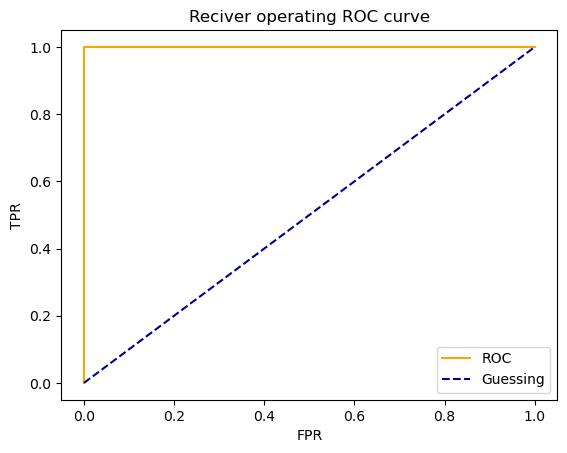

In [329]:
'''
ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

'''


# Create function for plottign ROC cruves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #baseline
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")

    #customize the plot
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Reciver operating ROC curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)
    

In [330]:
from sklearn.metrics import roc_auc_score
# auc is area under curve
roc_auc_score(y_test, y_probs_positive)


0.9401939655172413

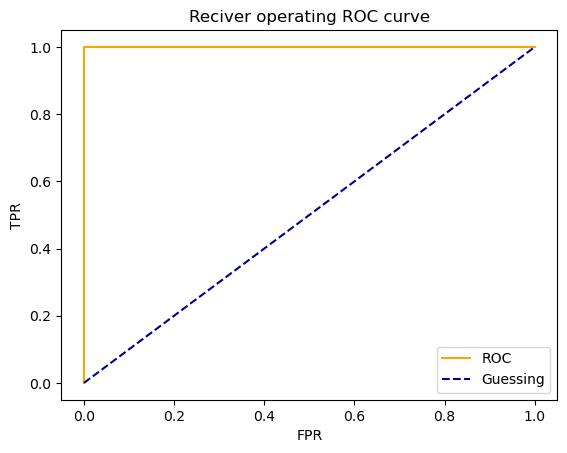

In [331]:
#plot perfect ROC curve and Auc score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)


In [332]:
# perfect Auc score
roc_auc_score(y_test, y_test)


1.0

In [ ]:
# Confusion Matrix

# compare the labels a model predicts and the actual labels

In [333]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]])

In [335]:
# visualize confusion matrix

pd.crosstab(y_test,
           y_preds,
           rownames=["actual labels"],
           colnames=["predicted labels"])

predicted labels,0,1
actual labels,,
0,24,5
1,5,27


In [343]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/advaitdarbare/Desktop/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-3.0.14             |       h80987f9_0         4.3 MB
    seaborn-0.13.2             |  py312hca03da5_0         714 KB
    ------------------------------------------------------------
                                           Total:         5.0 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-arm64::seaborn-0.13.2-py312hca03da5_0 

The following packages will be UPDATED:

  openssl                                 3.0.13-h1a28f6b_2 --> 3.0.14-h80987f9_0 



openssl-3.0.14       | 4.3 MB    |                                       |   0% 
openssl-3.0.14       | 4.3 MB    | 3                          

<Axes: >

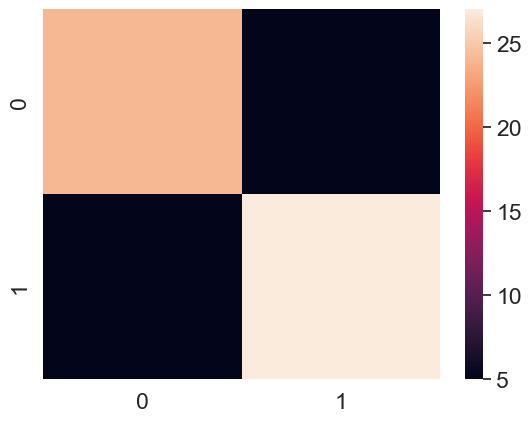

In [346]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

## Classfication Report

In [351]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

#precision - proportion of positive identifications which were actually correct
#recall - proportion actual postives which were correctly classified
#f1-score - combination of precision and reacall
#support - number of samples each metric was calculated on

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [353]:
# where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/Users/advaitdarbare/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/advaitdarbare/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/advaitdarbare/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [354]:
### 4.2.2 Regression model evaluation metrics

# R^2 coefficent of determination
# MAE
# MSE

In [356]:
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and Fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [357]:
# Chek the score of model on test set
model.score(X_test, y_test)

0.8059809073051385

In [359]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [363]:
y_test.mean()

2.0550030959302323

In [364]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [366]:
from sklearn.metrics import r2_score

# fill array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [368]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [371]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)
# score of 0 is poor

0.0

In [373]:
r2_score(y_true=y_test,
        y_pred=y_test)
# score of 1 is good

1.0

# MAE

In [377]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3270458119670544

In [379]:
df = pd.DataFrame(data={"actual values": y_test, 
                       "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


In [386]:
# mae using formulas and differences
np.abs(df["differences"]).mean()

0.3270458119670544

# MSE

In [387]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2542443610174998

In [389]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


# Classification Model Evaluation Metrics/Techniques
- Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
- Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).
- Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.
- Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
- ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.
- Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

## Which classification metric should you use?
- Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
- Precision and recall become more important when classes are imbalanced.
- If false-positive predictions are worse than false-negatives, aim for higher precision.
- If false-negative predictions are worse than false-positives, aim for higher recall.
- F1-score is a combination of precision and recall.
- A confusion matrix is always a good way to visualize how a classification model is going.

# Regression Model Evaluation Metrics/Techniques
- R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1
- Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
- Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

## Which regression metric should you use?
- R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
- MAE gives a better indication of how far off each of your model's predictions are on average.
- As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
    - Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.
    - Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.



In [390]:
#0. An end-to-end sci-kit-learn workflow
#1. Getting data ready
#2. Choose the right estimator/algo
#3. Fit model/algo and use to maek predictions
#4. Evaluate model
#5. Improve model
#6. Save and load trained model
#7. Putting all together

## 5.Improve model

In [394]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

In [395]:
# hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameters by hand

3 sets: training, validation, test


In [396]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [410]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification model
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return metric_dict

In [412]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 *len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metric = evaluate_preds(y_valid, y_preds)

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1 Score: 0.85


In [415]:
# diff hyperparameters

np.random.seed(42)

clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(X_train, y_train)

y_preds2 = clf2.predict(X_valid)

clf2metrics = evaluate_preds(y_valid, y_preds2)



Accuracy: 80.00%
Precision: 0.83
Recall: 0.80
F1 Score: 0.82


In [417]:
# diff hyperparameters

np.random.seed(42)

clf3 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf3.fit(X_train, y_train)

y_preds3 = clf2.predict(X_valid)

clf2metrics = evaluate_preds(y_valid, y_preds3)

Accuracy: 80.00%
Precision: 0.83
Recall: 0.80
F1 Score: 0.82


In [418]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 7. Putting all together

In [419]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [420]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [421]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

fill missing data
convert data to numbers
buidl model on data

In [422]:
# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer

# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

In [423]:
# Define different categorical features 
categorical_features = ["Make", "Colour"]

# Create categorical transformer Pipeline
categorical_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to "missing"
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    # Set OneHotEncoder to ignore the unknowns
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [424]:
# Define Doors features
door_feature = ["Doors"]

# Create Doors transformer Pipeline
door_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to 4
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

In [425]:
# Define numeric features (only the Odometer (KM) column)
numeric_features = ["Odometer (KM)"]

# Crearte numeric transformer Pipeline
numeric_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to fill missing values with the "Median"
    ("imputer", SimpleImputer(strategy="median"))])

In [426]:
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        # Use the categorical_transformer to transform the categorical_features
        ("cat", categorical_transformer, categorical_features),
        # Use the door_transformer to transform the door_feature
        ("door", door_transformer, door_feature),
        # Use the numeric_transformer to transform the numeric_features
        ("num", numeric_transformer, numeric_features)])

In [427]:

# Import Ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

# Import SVR from sklearn's svm module
from sklearn.svm import SVR

# Import RandomForestRegressor from sklearn's ensemble module
from sklearn.ensemble import RandomForestRegressor

In [428]:
# Create dictionary of model instances, there should be 4 total key, value pairs
# in the form {"model_name": model_instance}.
# Don't forget there's two versions of SVR, one with a "linear" kernel and the
# other with kernel set to "rbf".
regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf": SVR(kernel="rbf"),
                     "RandomForestRegressor": RandomForestRegressor()}

# Create an empty dictionary for the regression results
regression_results = {}

In [429]:
# Create car sales X data (every column of car_sales except Price)
car_sales_X = car_sales.drop("Price", axis=1)

# Create car sales y data (the Price column of car_sales)
car_sales_y = car_sales["Price"]

In [430]:
# Use train_test_split to split the car_sales_X and car_sales_y data into 
# training and test sets.
# Give the test set 20% of the data using the test_size parameter.
# For reproducibility set the random_state parameter to 42.
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_sales_X,
                                                                    car_sales_y,
                                                                    test_size=0.2,
                                                                    random_state=42)

# Check the shapes of the training and test datasets
car_X_train.shape, car_X_test.shape, car_y_train.shape, car_y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [431]:
# Loop through the items in the regression_models dictionary
for model_name, model in regression_models.items():
    
    # Create a model pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])
    
    # Fit the model pipeline to the car sales training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(car_X_train, car_y_train)
    
    # Score the model pipeline on the test data appending the model_name to the 
    # results dictionary
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(car_X_test, 
                                                          car_y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


In [433]:
# Check the results of each regression model by printing the regression_results
# dictionary
regression_results

{'Ridge': 0.4273452230449628,
 'SVR_linear': 0.1795305303672139,
 'SVR_rbf': -0.016775871227557415,
 'RandomForestRegressor': 0.31345484374174915}

In [434]:
# Import mean_absolute_error from sklearn's metrics module
from sklearn.metrics import mean_absolute_error

# Import mean_squared_error from sklearn's metrics module
from sklearn.metrics import mean_squared_error

# Import r2_score from sklearn's metrics module
from sklearn.metrics import r2_score

In [435]:
# Create RidgeRegression Pipeline with preprocessor as the "preprocessor" and
# Ridge() as the "model".
ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", Ridge())])

# Fit the RidgeRegression Pipeline to the car sales training data
ridge_pipeline.fit(car_X_train, car_y_train)

# Make predictions on the car sales test data using the RidgeRegression Pipeline
car_y_preds = ridge_pipeline.predict(car_X_test)

# View the first 50 predictions
car_y_preds[:50]

array([ 8024.75178372, 12074.9827987 , 31294.60487184, 22173.85140962,
       29325.3711082 , 10923.24680522,  8452.46478625, 13711.8428932 ,
       10962.35136497, 16085.00626242, 27977.72349662, 16432.52462438,
       22374.00936762,  7550.27025246, 14138.04539318, 22556.59227781,
       14704.47417247, 16533.35334511, 18238.93803247, 14824.26751451,
       29320.77377358, 13122.85997881, 20409.3278257 ,  8560.1663658 ,
       22480.27048827, 20419.92958442, 11247.2519387 , 17094.49117868,
       27924.54069386, 22850.8216935 , 18723.67163467, 14469.98943608,
       15793.85915063, 16472.88072803, 17128.50100638, 10650.72212879,
        9474.83305771, 27303.01239869,  9003.93740063, 11707.56172617,
       16713.85015766, 22211.00854473, 22349.6060764 , 14866.29464859,
       18368.37261014, 20295.16106562, 12353.14232851, 10835.47869421,
       20678.68998404, 22640.31690233])

In [436]:
# EXAMPLE: Find the MSE by comparing the car sales test labels to the car sales predictions
mse = mean_squared_error(car_y_test, car_y_preds)
# Return the MSE
mse

52345988.99892336

In [439]:
# Find the MAE by comparing the car sales test labels to the car sales predictions
mae =  mean_absolute_error(car_y_test, car_y_preds)
# Return the MAE
mae

5787.118838890167

In [440]:
# Find the R^2 score by comparing the car sales test labels to the car sales predictions
r2 = r2_score(car_y_test, car_y_preds)
# Return the R^2 score
r2

0.4273452230449628